In [1]:
import skyfield
from skyfield.api import EarthSatellite, load, wgs84, N, S, E, W
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from numpy import array2string

In [2]:
## Charge le module 'temps'
ts = load.timescale()

DJIBUTI 1A
1 99027U          23326.34930556  .00000000  00000-0  16330-2 0    06
2 99027  97.4926  38.9259 0012683 242.9791 178.1799 15.13638940    08

In [3]:
line1 = '1 99027U          23326.34930556  .00000000  00000-0  16330-2 0    06'
line2 = '2 99027  97.4926  38.9259 0012683 242.9791 178.1799 15.13638940    08'
satellite = EarthSatellite(line1, line2, 'DJIB 1A')
print(satellite)

DJIB 1A catalog #99027 epoch 2023-11-22 08:23:00 UTC


In [4]:
csum = wgs84.latlon(43.637 * N, 3.843 * E)

csum_2 = wgs84.latlon(43.637 * N, 3.97 * E)

In [5]:
t = ts.utc(2023, 11, 26, 21, 41, range(0,10*60)) # heure utc
t_datetime = []
for ti in t:
    ti_date = ti.utc_strftime('%Y %b %d %H:%M:%S')
    #print(ti_date)
    t_datetime.append(datetime.datetime.strptime(ti_date, "%Y %b %d %H:%M:%S"))
print(f"taille de l'échantillon de date : {len(t_datetime)}")

taille de l'échantillon de date : 600


In [6]:
pos = (satellite - csum).at(t)
_, _, the_range, _, _, range_rate = pos.frame_latlon_and_rates(csum)

sat_range = the_range.km
sat_rate = range_rate.km_per_s

#print(array2string(the_range.km, precision=1), 'km')
#print(array2string(range_rate.km_per_s, precision=2), 'km/s')

print(f"taille de l'échantillon de range : {len(sat_range)}")

taille de l'échantillon de range : 600


In [7]:
pos = (satellite - csum_2).at(t)
_, _, the_range2, _, _, range_rate2 = pos.frame_latlon_and_rates(csum)

sat_range2 = the_range2.km
sat_rate2 = range_rate2.km_per_s

#print(array2string(the_range.km, precision=1), 'km')
#print(array2string(range_rate.km_per_s, precision=2), 'km/s')

print(f"taille de l'échantillon de range : {len(sat_range2)}")

taille de l'échantillon de range : 600


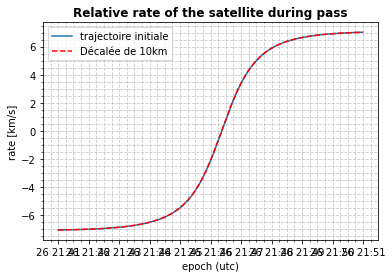

In [8]:
plt.rcParams["figure.figsize"] = [15,5]
plt.rcParams['font.size'] = '12'


# PLOT
plt.plot(t_datetime, sat_rate, label = 'trajectoire initiale')
plt.plot(t_datetime, sat_rate2, "--r", label = 'Décalée de 10km')


# LEGEND
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')
plt.legend(loc = 'best',ncol = 1)

plt.title('Relative rate of the satellite during pass', fontweight="bold")

# LABELS
plt.xlabel('epoch (utc)')
plt.ylabel('rate [km/s]')

# GRILLES
plt.minorticks_on() #Grille mineure
plt.grid(True, which='both') 
plt.grid(alpha=0.7,which='both', linestyle='--')

plt.show()

In [9]:
freq_TX = 401.8e6 # Hz
c = 299792.458 # km / s

In [10]:
def doppler_shift(D_v, f0):
    return(D_v*f0/c)

In [11]:
7/1000

0.007

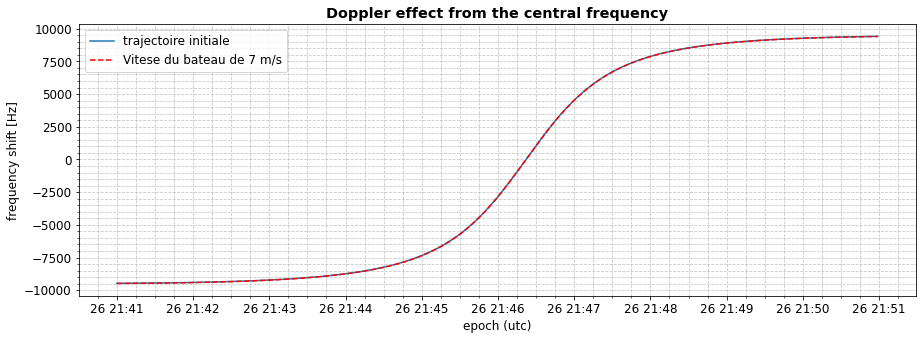

In [12]:
plt.rcParams["figure.figsize"] = [15,5]
plt.rcParams['font.size'] = '12'

# PLOT
plt.plot(t_datetime, doppler_shift(sat_rate,freq_TX),  label = 'trajectoire initiale')
plt.plot(t_datetime, doppler_shift((sat_rate - 0.007) ,freq_TX), "--r", label = 'Vitese du bateau de 7 m/s')

# LEGEND
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')
plt.legend(loc = 'best',ncol = 1)

plt.title('Doppler effect from the central frequency', fontweight="bold")

# LABELS
plt.xlabel('epoch (utc)')
plt.ylabel('frequency shift [Hz]')

# GRILLES
plt.minorticks_on() #Grille mineure
plt.grid(True, which='both') 
plt.grid(alpha=0.7,which='both', linestyle='--')

plt.show()

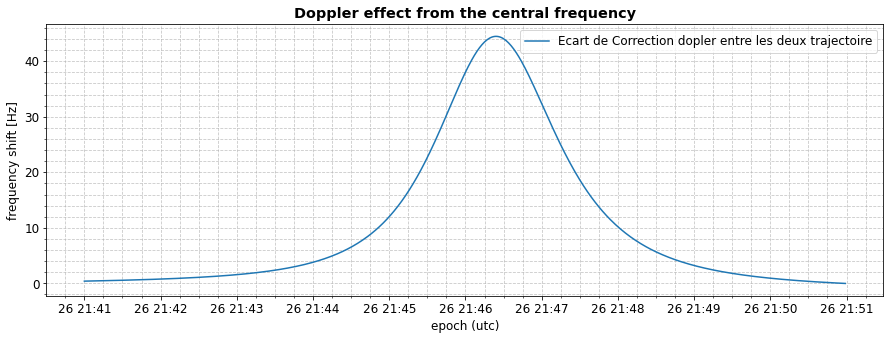

In [13]:
plt.rcParams["figure.figsize"] = [15,5]
plt.rcParams['font.size'] = '12'

# PLOT
plt.plot(t_datetime, (doppler_shift(sat_rate2,freq_TX) - doppler_shift(sat_rate,freq_TX)),  label = 'Ecart de Correction dopler entre les deux trajectoire')

# LEGEND
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')
plt.legend(loc = 'best',ncol = 1)

plt.title('Doppler effect from the central frequency', fontweight="bold")

# LABELS
plt.xlabel('epoch (utc)')
plt.ylabel('frequency shift [Hz]')

# GRILLES
plt.minorticks_on() #Grille mineure
plt.grid(True, which='both') 
plt.grid(alpha=0.7,which='both', linestyle='--')

plt.show()

In [14]:
from findiff import FinDiff

In [15]:
d_dt = FinDiff(0,1)

In [16]:
d_doppler_shift = d_dt(doppler_shift(sat_rate,freq_TX))

In [17]:
def accroiss(l):
    d_l = []
    pas_temps = 1
    for i in range(0, (len(l)-1)):
        drift = (l[i+1]-l[i])/pas_temps
        d_l.append(drift)
    return(d_l)

In [18]:
d_f_doppler = list(doppler_shift(sat_rate,freq_TX))
len(d_f_doppler)

600

In [19]:
len(accroiss(d_f_doppler))

599

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


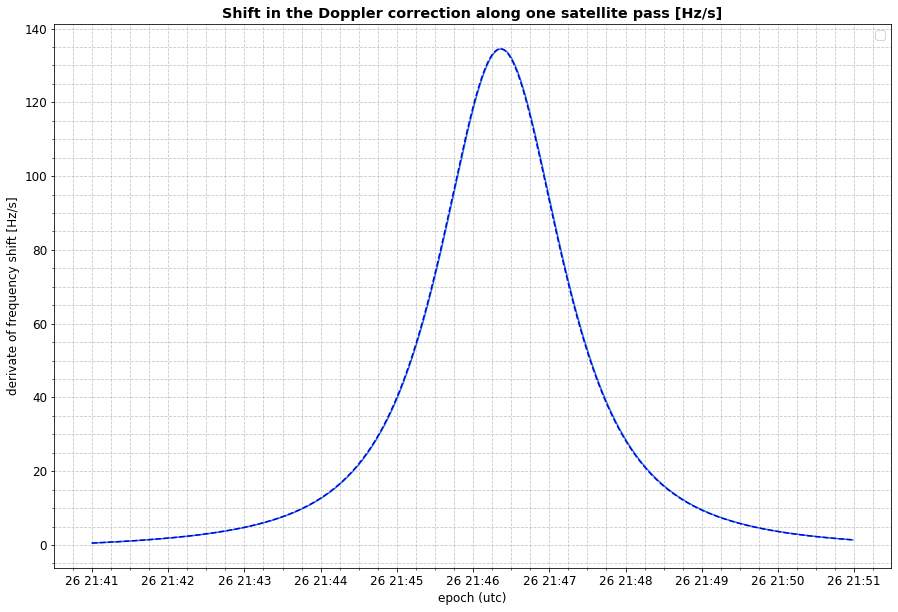

In [20]:
plt.rcParams["figure.figsize"] = [15,10]
plt.rcParams['font.size'] = '12'

# PLOT
plt.plot(t_datetime, d_doppler_shift)
plt.plot(t_datetime[:-1], accroiss(d_f_doppler), 'b--')

# LEGEND
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')
plt.legend(loc = 'best',ncol = 1)

plt.title('Shift in the Doppler correction along one satellite pass [Hz/s]', fontweight="bold")

# LABELS
plt.xlabel('epoch (utc)')
plt.ylabel('derivate of frequency shift [Hz/s]')

# GRILLES
plt.minorticks_on() #Grille mineure
plt.grid(True, which='both') 
plt.grid(alpha=0.7,which='both', linestyle='--')


plt.savefig("doppler_shift.png" , bbox_inches='tight')
plt.show()

In [21]:
max(accroiss(d_f_doppler))

134.48982206620778